# EFFECTIVE TARGETING OF ADVERTISEMENTS

In [100]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB 
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier



In [101]:
# Reading the dataset
df=pd.read_csv('advertising_ef.csv')

In [102]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,11-02-2016 21:49,1
1005,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,22-04-2016 02:07,1
1006,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,01-02-2016 17:24,1
1007,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,24-03-2016 02:35,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [104]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [105]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
1004,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,11-02-2016 21:49,1
1005,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,22-04-2016 02:07,1
1006,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,01-02-2016 17:24,1
1007,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,24-03-2016 02:35,0
1008,45.01,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,03-06-2016 21:43,1


Display the shape of the dataset

In [106]:
df.shape

(1009, 10)

In [107]:
df.size

10090

In [108]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [109]:
df.describe

<bound method NDFrame.describe of       Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        68.95  35.0     61833.90                256.09   
1                          NaN  31.0     68441.85                193.77   
2                        69.47  26.0     59785.94                236.50   
3                        74.15  29.0     54806.18                245.89   
4                        68.37  35.0     73889.99                225.58   
...                        ...   ...          ...                   ...   
1004                     72.97  30.0     71384.57                208.58   
1005                     51.30  45.0     67782.17                134.42   
1006                     51.63  51.0     42415.72                120.37   
1007                     55.55  19.0     41920.79                187.95   
1008                     45.01  26.0     29875.80                178.35   

                              Ad Topic Line            City  Gend

In [110]:
df.dtypes

Daily Time Spent on Site    float64
Age                         float64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Gender                       object
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

# Preprocessing

In [111]:
# checking duplicate values
df.duplicated().sum()

0

In [112]:
# finding unique values
df.nunique()

Daily Time Spent on Site     898
Age                           43
Area Income                  991
Daily Internet Usage         964
Ad Topic Line               1000
City                         961
Gender                         2
Country                      237
Timestamp                    997
Clicked on Ad                  2
dtype: int64

In [113]:
# finding unique of each columns

In [114]:
df['Daily Time Spent on Site'].unique()


array([68.95,   nan, 69.47, 74.15, 68.37, 59.99, 88.91, 74.53, 69.88,
       47.64, 83.07, 69.57, 79.52, 42.95, 63.45, 55.39, 82.03, 54.7 ,
       74.58, 77.22, 84.59, 41.49, 87.29, 41.39, 78.74, 48.53, 51.95,
       70.2 , 76.02, 67.64, 86.41, 59.05, 55.6 , 57.64, 84.37, 62.26,
       65.82, 50.43, 38.93, 84.98, 64.24, 82.52, 81.38, 80.47, 37.68,
       69.62, 85.4 , 44.33, 48.01, 73.18, 79.94, 33.33, 50.33, 62.31,
       80.6 , 65.19, 44.98, 77.63, 41.82, 85.61, 85.84, 72.08, 86.06,
       45.96, 62.42, 63.89, 35.33, 75.74, 78.53, 46.13, 69.01, 55.35,
       33.21, 38.46, 64.1 , 49.81, 82.73, 56.14, 55.13, 78.11, 73.46,
       56.64, 68.94, 70.79, 57.76, 77.51, 52.7 , 57.7 , 56.89, 69.9 ,
       55.79, 70.03, 50.08, 43.67, 72.84, 45.72, 39.94, 35.61, 79.71,
       63.6 , 89.91, 68.18, 66.49, 80.49, 72.23, 42.39, 47.53, 74.02,
       66.63, 63.24, 71.  , 69.  , 76.99, 72.6 , 61.88, 84.45, 88.97,
       86.19, 49.58, 77.65, 37.75, 62.33, 79.57, 80.31, 89.05, 70.41,
       67.36, 46.98,

In [115]:
df['Age'].unique()

array([35., 31., 26., 29., 23., 33., 48., 30., 20., 49., 37., 24., 41.,
       36., 40., 52., 28., 34., 22., 57., 53., 39., 46., 32., 25., 43.,
       45., 50., 47., 27., 42., 38., 54., 21., 60., 55., 44., 58., 56.,
       51., nan, 19., 59., 61.])

In [116]:
df['Area Income'].unique()

array([61833.9 , 68441.85, 59785.94, 54806.18, 73889.99, 59761.56,
       53852.85, 24593.33,      nan, 55642.32, 45632.51, 62491.01,
       51636.92, 51739.63, 30976.  , 52182.23, 23936.86, 71511.08,
       31087.54, 64802.33, 60015.57, 32635.7 , 61628.72, 68962.32,
       64828.  , 38067.08, 58295.82, 32708.94, 46179.97, 51473.28,
       45593.93, 25583.29, 30227.98, 45580.92, 61389.5 , 56770.79,
       76435.3 , 57425.87, 27508.41, 59784.18, 66572.39, 64929.61,
       57519.64, 53575.48, 50983.75, 67058.72, 54286.1 , 61526.25,
       58526.04, 53350.11, 62657.53, 62722.57, 67479.62, 75254.88,
       52336.64, 56113.37, 24852.9 , 47708.42, 64654.66, 71228.44,
       61601.05, 66281.46, 73910.9 , 51317.33, 51510.18, 61005.87,
       32536.98, 60248.97, 75509.61, 42650.32, 58183.04, 60465.72,
       57009.76, 54541.56, 32689.04, 55605.92, 63296.87, 65653.47,
       61652.53, 30726.26, 74535.94, 47861.93, 73600.28, 58543.94,
       42696.67, 37334.78, 71392.53, 59550.05, 64264.25, 64147

In [117]:
 df['Daily Internet Usage'].unique()

array([256.09, 193.77, 236.5 , 245.89, 225.58, 226.74, 208.36, 131.76,
       221.51, 183.82, 122.02, 230.87, 113.12, 214.23, 143.56, 140.64,
       129.41, 187.53, 118.39, 135.51, 224.44, 226.54, 164.83, 209.93,
       167.22, 204.79, 134.14, 129.23, 119.2 , 209.82, 267.01, 207.48,
       169.23, 212.58, 133.81, 201.58, 125.45, 221.94, 119.32, 162.08,
       202.61, 252.36, 198.11, 212.3 , 204.86, 172.83, 202.25, 198.72,
       123.72, 119.93, 196.71, 225.29, 193.58, 133.2 , 119.3 , 177.55,
       150.61, 129.31, 239.22, 156.36, 183.43, 192.93, 169.5 , 178.92,
       141.22, 198.5 , 105.22, 200.22, 215.25, 131.72, 139.01, 222.63,
       153.17, 167.07, 145.98, 215.93, 120.06, 238.99, 113.53, 111.71,
       209.25, 222.75, 115.91, 138.71, 184.1 , 105.15, 200.55, 118.6 ,
       109.07, 109.29, 138.35, 149.67, 227.72, 125.85, 166.29, 238.63,
       154.02, 156.3 , 158.22, 211.65, 169.18, 235.28, 194.23, 218.17,
       202.16, 229.12, 241.03, 150.99, 135.18, 210.54, 176.98, 235.78,
      

In [118]:
df['Ad Topic Line'].unique()

array(['Cloned 5thgeneration orchestration',
       'Monitored national standardization',
       'Organic bottom-line service-desk',
       'Triple-buffered reciprocal time-frame',
       'Robust logistical utilization', 'Sharable client-driven software',
       'Enhanced dedicated support', 'Reactive local challenge',
       'Configurable coherent function',
       'Mandatory homogeneous architecture',
       'Centralized neutral neural-net',
       'Team-oriented grid-enabled Local Area Network',
       'Centralized content-based focus group',
       'Synergistic fresh-thinking array',
       'Grass-roots coherent extranet',
       'Persistent demand-driven interface',
       'Customizable multi-tasking website', 'Intuitive dynamic attitude',
       'Grass-roots solution-oriented conglomeration',
       'Advanced 24/7 productivity',
       'Object-based reciprocal knowledgebase',
       'Streamlined non-volatile analyzer',
       'Mandatory disintermediate utilization',
       'Futur

In [119]:
df['City'].unique()

array(['Wrightburgh', 'West Jodi', 'Davidton', 'West Terrifurt',
       'South Manuel', nan, 'Brandonstad', 'Port Jefferybury',
       'West Colin', 'Ramirezton', 'West Brandonton', 'West Katiefurt',
       'North Tara', 'West William', 'New Travistown', 'Pruittmouth',
       'Jessicastad', 'Millertown', 'Lake Nicole', 'South John',
       'Pamelamouth', 'Harperborough', 'Port Danielleberg',
       'West Jeremyside', 'South Cathyfurt', 'Palmerside', 'West Guybury',
       'Phelpschester', 'Lake Melindamouth', 'Port Cassie', 'New Thomas',
       'Johnstad', 'West Aprilport', 'Kellytown', 'Charlesport',
       'Millerchester', 'Mackenziemouth', 'Zacharystad', 'North Joshua',
       'Bowenview', 'Jamesberg', 'Lake Cassandraport', 'New Sharon',
       'Johnport', 'Hamiltonfort', 'West Christopher', 'Hollandberg',
       'Odomville', 'East Samanthashire', 'South Lauraton', 'Amandahaven',
       'Thomasview', 'Garciaside', 'Port Sarahshire', 'Port Gregory',
       'Brendachester', 'Lake Amy'

In [120]:
 df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [121]:
df['Country'].unique()

array(['Tunisia', 'Nauru', 'San Marino', 'Italy', 'Iceland', 'Norway',
       'Myanmar', 'Australia', 'Grenada', 'Ghana', 'Qatar', 'Burundi',
       'Egypt', 'Bosnia and Herzegovina', 'Barbados', 'Spain',
       'Palestinian Territory', 'Afghanistan',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Russian Federation', 'Cameroon', 'Korea', 'Tokelau', 'Monaco',
       'Tuvalu', 'Greece', 'British Virgin Islands',
       'Bouvet Island (Bouvetoya)', 'Peru', 'Aruba', 'Maldives',
       'Senegal', 'Dominica', 'Luxembourg', 'Montenegro', 'Ukraine',
       'Saint Helena', 'Liberia', nan, 'Niger', 'Turkmenistan',
       'Sri Lanka', 'Trinidad and Tobago', 'United Kingdom',
       'Guinea-Bissau', 'Micronesia', 'Turkey', 'Croatia', 'Israel',
       'Svalbard & Jan Mayen Islands', 'Azerbaijan', 'Iran',
       'Saint Vincent and the Grenadines', 'Bulgaria', 'Christmas Island',
       'Canada', 'Rwanda', 'Turks and Caicos Islands', 'Norfolk Island',
       'Cook Islands', 'G

In [122]:
df['Timestamp'].unique()

array(['27-03-2016 00:53', '04-04-2016 01:39', '13-03-2016 20:35',
       '10-01-2016 02:31', '03-06-2016 03:36', '19-05-2016 14:30',
       '28-01-2016 20:59', '07-03-2016 01:40', '18-04-2016 09:33',
       '11-07-2016 01:42', '16-03-2016 20:19', '08-05-2016 08:10',
       '03-06-2016 01:14', '20-04-2016 21:49', '24-03-2016 09:31',
       '09-03-2016 03:41', '30-01-2016 19:20', '02-05-2016 07:00',
       '13-02-2016 07:53', '27-02-2016 04:43', '05-01-2016 07:52',
       '18-03-2016 13:22', '20-05-2016 08:49', '23-03-2016 09:43',
       '13-06-2016 17:27', '27-05-2016 15:25', '08-02-2016 10:46',
       '19-07-2016 08:32', '14-04-2016 05:08', '27-01-2016 12:38',
       '02-07-2016 20:23', '01-03-2016 22:13', '15-07-2016 05:05',
       '14-01-2016 14:00', '15-03-2016 03:12', '12-04-2016 03:26',
       '07-04-2016 15:18', '09-02-2016 05:28', '07-05-2016 17:11',
       '11-03-2016 06:49', '27-04-2016 09:27', '16-04-2016 11:53',
       '08-05-2016 15:38', '08-02-2016 00:23', '11-02-2016 13:

In [123]:
df['Clicked on Ad'].unique()

array([0, 1], dtype=int64)

In [124]:
# checking NaN values
df.isna().sum().sort_values(ascending=False)

Country                     13
Age                         11
Area Income                 11
City                        11
Daily Time Spent on Site     4
Daily Internet Usage         4
Ad Topic Line                0
Gender                       0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [125]:
# Filling NaN values with mean
df['Daily Time Spent on Site']=df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Area Income']=df['Area Income'].fillna(df['Area Income'].mean())
df['Daily Internet Usage']=df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())

In [126]:
# Calculate the average age
avg_age=df['Age'].median()

In [127]:
avg_age

35.0

In [128]:
# Fill missing values in the 'Age' column with average age
df['Age']=df['Age'].fillna(avg_age)

In [129]:
df['Age']

0       35.0
1       31.0
2       26.0
3       29.0
4       35.0
        ... 
1004    30.0
1005    45.0
1006    51.0
1007    19.0
1008    26.0
Name: Age, Length: 1009, dtype: float64

In [130]:
# Use fillna method 'ffill' to replace the none value with a previous not null value
df['City'].fillna(method='ffill',inplace=True)
df['City']

0          Wrightburgh
1            West Jodi
2             Davidton
3       West Terrifurt
4         South Manuel
             ...      
1004         Duffystad
1005       New Darlene
1006     South Jessica
1007       West Steven
1008       Ronniemouth
Name: City, Length: 1009, dtype: object

In [131]:
# Use fillna method 'ffill' to replace the none value with a previous not null value
df['Country'].fillna(method='ffill',inplace=True)
df['Country']

0                      Tunisia
1                        Nauru
2                   San Marino
3                        Italy
4                      Iceland
                 ...          
1004                   Lebanon
1005    Bosnia and Herzegovina
1006                  Mongolia
1007                 Guatemala
1008                    Brazil
Name: Country, Length: 1009, dtype: object

Label Encoding

In [132]:
le_data=LabelEncoder()

In [133]:
model=le_data.fit_transform(df['Ad Topic Line'])
df['Ad Topic Line']=model

In [134]:
model=le_data.fit_transform(df['City'])
df['City']=model

In [135]:
model=le_data.fit_transform(df['Country'])
df['Country']=model

In [136]:
model=le_data.fit_transform(df['Gender'])
df['Gender']=model


In [137]:
model

array([0, 1, 0, ..., 1, 0, 0])

In [138]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.950000,35.0,61833.90,256.09,91,953,0,215,27-03-2016 00:53,0
1,65.009463,31.0,68441.85,193.77,464,895,1,147,04-04-2016 01:39,0
2,69.470000,26.0,59785.94,236.50,566,112,0,184,13-03-2016 20:35,0
3,74.150000,29.0,54806.18,245.89,903,931,1,103,10-01-2016 02:31,0
4,68.370000,35.0,73889.99,225.58,766,799,0,96,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
1004,72.970000,30.0,71384.57,208.58,345,127,1,116,11-02-2016 21:49,1
1005,51.300000,45.0,67782.17,134.42,359,485,1,26,22-04-2016 02:07,1
1006,51.630000,51.0,42415.72,120.37,263,792,1,140,01-02-2016 17:24,1
1007,55.550000,19.0,41920.79,187.95,641,927,0,85,24-03-2016 02:35,0


In [139]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [140]:
# split Timestamp column into 2 ie,month and hour
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Date']=df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Min']=df['Timestamp'].dt.minute
df = df.drop(['Timestamp'], axis=1)

In [141]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Date,Hour,Min
0,68.950000,35.0,61833.90,256.09,91,953,0,215,0,3,27,0,53
1,65.009463,31.0,68441.85,193.77,464,895,1,147,0,4,4,1,39
2,69.470000,26.0,59785.94,236.50,566,112,0,184,0,3,13,20,35
3,74.150000,29.0,54806.18,245.89,903,931,1,103,0,10,1,2,31
4,68.370000,35.0,73889.99,225.58,766,799,0,96,0,3,6,3,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,72.970000,30.0,71384.57,208.58,345,127,1,116,1,11,2,21,49
1005,51.300000,45.0,67782.17,134.42,359,485,1,26,1,4,22,2,7
1006,51.630000,51.0,42415.72,120.37,263,792,1,140,1,1,2,17,24
1007,55.550000,19.0,41920.79,187.95,641,927,0,85,0,3,24,2,35


# Data Visualization

In [142]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Date,Hour,Min
0,68.950000,35.0,61833.90,256.09,91,953,0,215,0,3,27,0,53
1,65.009463,31.0,68441.85,193.77,464,895,1,147,0,4,4,1,39
2,69.470000,26.0,59785.94,236.50,566,112,0,184,0,3,13,20,35
3,74.150000,29.0,54806.18,245.89,903,931,1,103,0,10,1,2,31
4,68.370000,35.0,73889.99,225.58,766,799,0,96,0,3,6,3,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,72.970000,30.0,71384.57,208.58,345,127,1,116,1,11,2,21,49
1005,51.300000,45.0,67782.17,134.42,359,485,1,26,1,4,22,2,7
1006,51.630000,51.0,42415.72,120.37,263,792,1,140,1,1,2,17,24
1007,55.550000,19.0,41920.79,187.95,641,927,0,85,0,3,24,2,35


BAR GRAPH

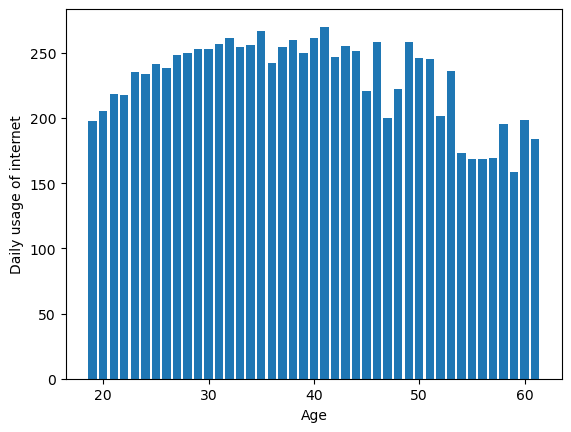

In [143]:
# Analysing the age column with Daily Usage of internet
x=df['Age']
y=df['Daily Internet Usage']
plt.bar(x,y)
plt.xlabel('Age')
plt.ylabel('Daily usage of internet')
plt.show()

BOXPLOT

<AxesSubplot:xlabel='Month', ylabel='Daily Time Spent on Site'>

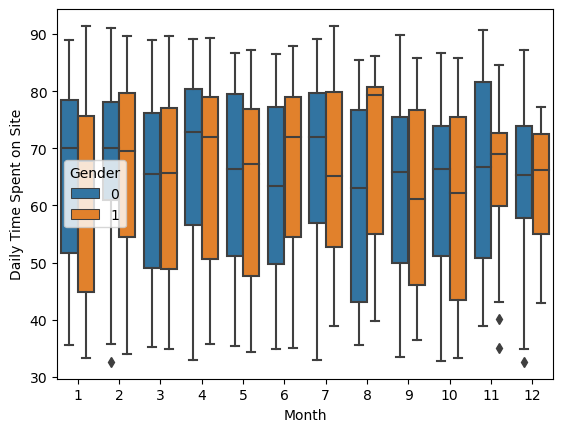

In [144]:
# Analysing month with daily time spent  on site
sns.boxplot(x='Month',y='Daily Time Spent on Site',data=df,hue='Gender')

BAR GRAPH

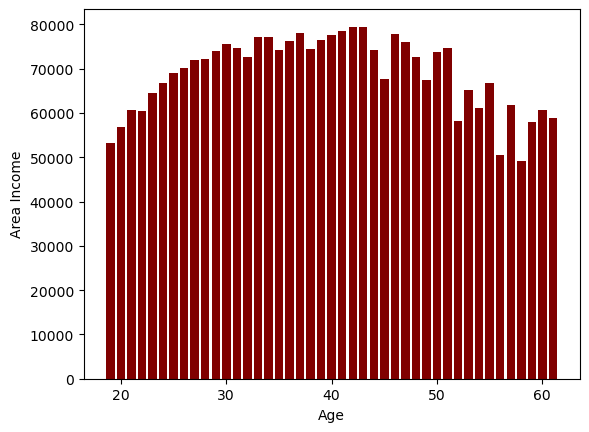

In [145]:
# Area income on basis of age
x=df['Age']
y=df['Area Income']
plt.bar(x,y,color='maroon',width=0.8)
plt.xlabel('Age')
plt.ylabel('Area Income')
plt.show()



PIECHART

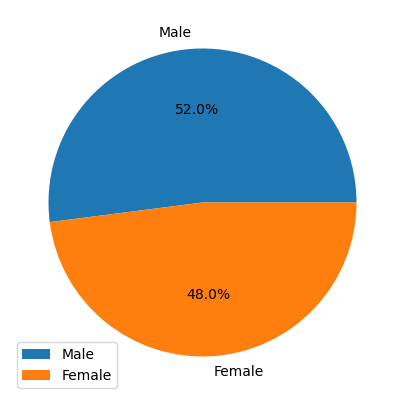

In [146]:
#  number of males and females
y=df['Gender'].value_counts()
plt.figure(figsize=(5,5))
labels=['Male','Female']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()




In [147]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Date,Hour,Min
0,68.950000,35.0,61833.90,256.09,91,953,0,215,0,3,27,0,53
1,65.009463,31.0,68441.85,193.77,464,895,1,147,0,4,4,1,39
2,69.470000,26.0,59785.94,236.50,566,112,0,184,0,3,13,20,35
3,74.150000,29.0,54806.18,245.89,903,931,1,103,0,10,1,2,31
4,68.370000,35.0,73889.99,225.58,766,799,0,96,0,3,6,3,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,72.970000,30.0,71384.57,208.58,345,127,1,116,1,11,2,21,49
1005,51.300000,45.0,67782.17,134.42,359,485,1,26,1,4,22,2,7
1006,51.630000,51.0,42415.72,120.37,263,792,1,140,1,1,2,17,24
1007,55.550000,19.0,41920.79,187.95,641,927,0,85,0,3,24,2,35


HISTPLOT

<AxesSubplot:xlabel='Age', ylabel='Count'>

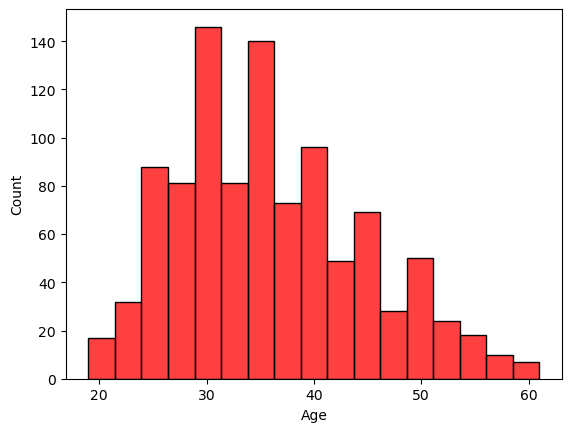

In [148]:
# analysing the age column count
sns.histplot(df['Age'],color='red')

DISPLOT

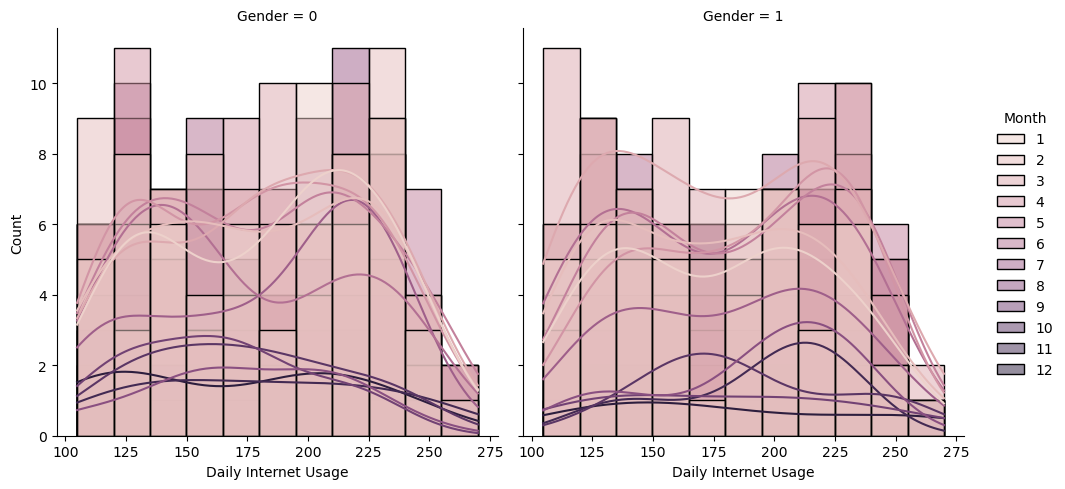

In [149]:
# daily internet usage monthly by both gender 
sns.displot(data=df,x='Daily Internet Usage',hue='Month',col='Gender',kde=True)


# Data Modelling

Finding correlation 

In [150]:
cor=df.corr()
cor

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Date,Hour,Min
Daily Time Spent on Site,1.000000,-0.327835,0.310472,0.514308,-0.020151,-0.014222,-0.021210,-0.007231,-0.742964,-0.021937,-0.007768,0.005866,-0.021823
Age,-0.327835,1.000000,-0.178185,-0.366353,-0.022755,-0.015567,-0.016146,-0.003021,0.487808,0.021373,-0.036648,-0.054559,-0.030007
Area Income,0.310472,-0.178185,1.000000,0.331394,-0.035913,-0.002295,0.008326,0.048389,-0.472515,-0.034775,-0.016898,0.030579,-0.001761
Daily Internet Usage,0.514308,-0.366353,0.331394,1.000000,-0.005271,-0.009914,0.027567,0.015978,-0.785501,-0.002890,-0.004888,0.073225,0.010582
Ad Topic Line,-0.020151,-0.022755,-0.035913,-0.005271,1.000000,-0.018108,-0.030139,0.040653,0.027450,0.029966,-0.036890,0.011374,0.064604
City,-0.014222,-0.015567,-0.002295,-0.009914,-0.018108,1.000000,0.022916,0.015362,-0.008638,0.051571,-0.078105,-0.011809,-0.015879
Gender,-0.021210,-0.016146,0.008326,0.027567,-0.030139,0.022916,1.000000,-0.019937,-0.038563,-0.029448,0.000555,0.053415,0.055325
Country,-0.007231,-0.003021,0.048389,0.015978,0.040653,0.015362,-0.019937,1.000000,0.001859,-0.020321,0.051632,0.005801,-0.020492
Clicked on Ad,-0.742964,0.487808,-0.472515,-0.785501,0.027450,-0.008638,-0.038563,0.001859,1.000000,0.039507,-0.018185,-0.049069,0.024566
Month,-0.021937,0.021373,-0.034775,-0.002890,0.029966,0.051571,-0.029448,-0.020321,0.039507,1.000000,-0.407063,-0.005081,-0.019601


<AxesSubplot:>

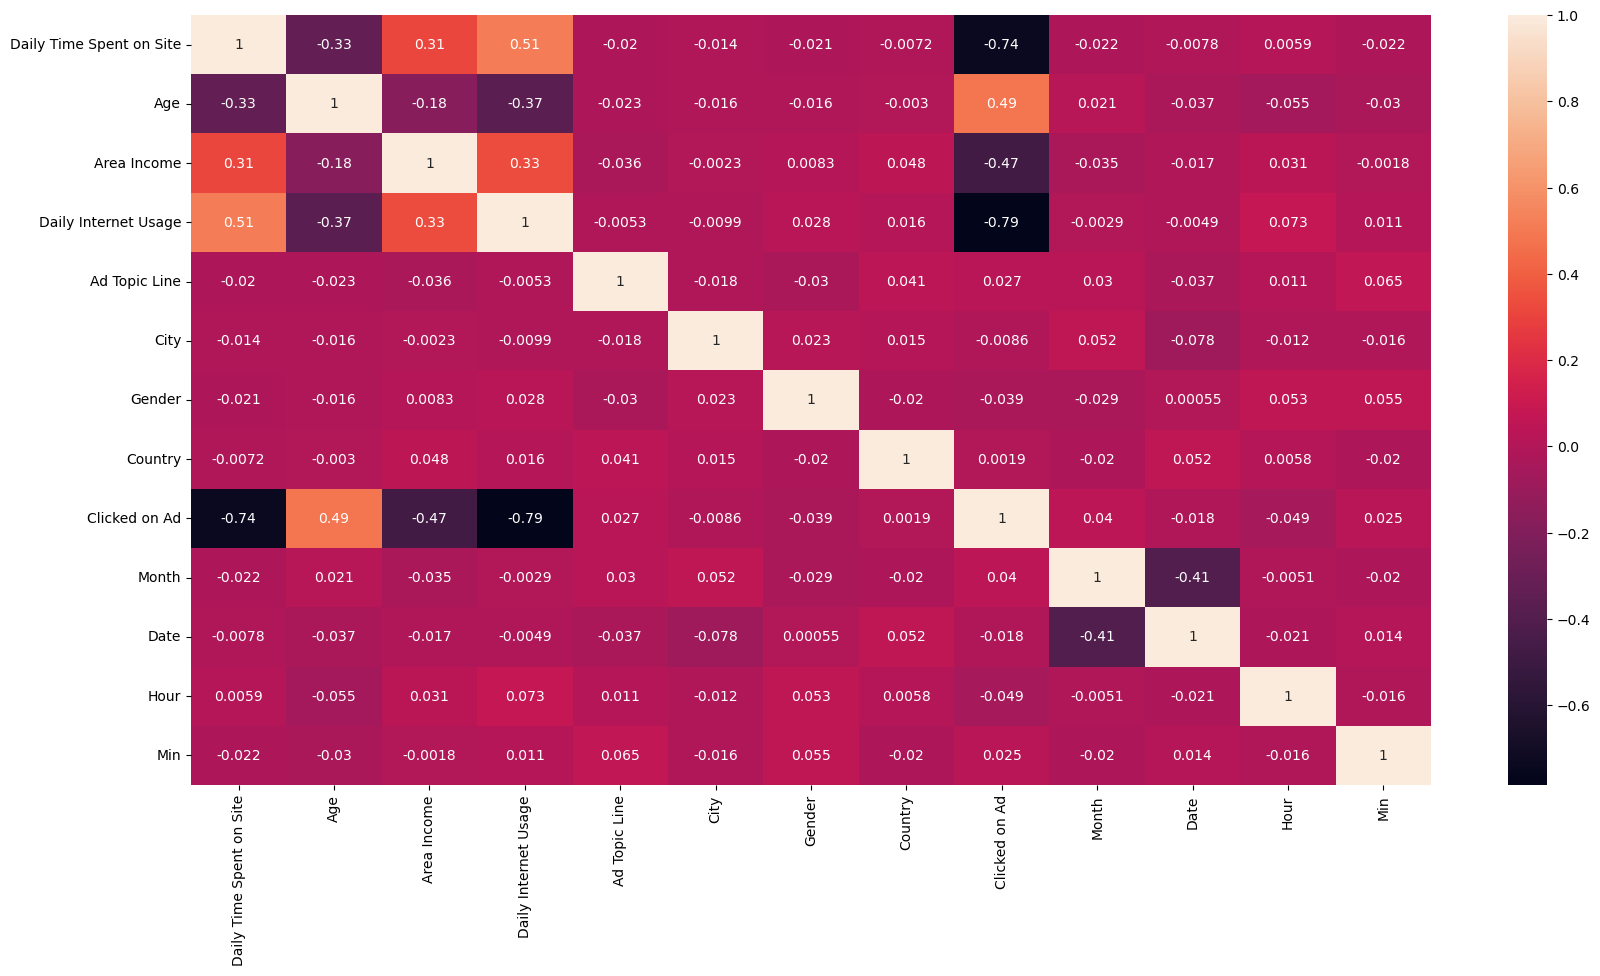

In [151]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

In [152]:
# Feature Matrix
X=df.drop('Clicked on Ad',axis=1)
y=df['Clicked on Ad']

In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [193]:
X_train.shape,X_test.shape

((807, 12), (202, 12))

In [194]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Month,Date,Hour,Min
765,72.94,31.0,74159.69,190.84,498,737,0,230,4,29,13,38
728,76.76,25.0,50468.36,230.77,790,345,1,155,5,26,13,28
658,52.84,43.0,28495.21,122.31,496,261,0,187,7,16,10,14
150,58.18,25.0,69112.84,176.28,610,834,1,152,10,2,6,37
530,59.61,21.0,60637.62,198.45,348,663,1,35,6,4,5,55
...,...,...,...,...,...,...,...,...,...,...,...,...
835,42.51,30.0,54755.71,144.77,367,403,1,161,1,15,19,45
192,60.70,49.0,42993.48,110.57,465,674,1,9,6,19,3,19
629,85.77,27.0,52261.73,191.78,389,772,1,143,9,4,23,26
559,56.20,49.0,53549.94,114.85,5,150,1,15,4,21,18,31


In [195]:
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Month,Date,Hour,Min
801,79.22,27.0,63429.18,198.79,417,562,1,20,11,3,12,39
311,54.92,54.0,23975.35,161.16,271,732,0,181,6,13,13,59
85,57.76,41.0,47861.93,105.15,905,366,0,170,12,6,15,25
435,69.58,43.0,28028.74,255.07,127,676,0,47,4,4,18,36
204,70.04,31.0,74780.74,183.85,418,236,1,107,3,27,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...
784,67.85,41.0,78520.99,202.70,727,171,1,177,1,21,22,51
231,66.67,33.0,72707.87,228.03,370,841,1,206,4,21,20,29
5,59.99,23.0,59761.56,226.74,805,799,1,158,5,19,14,30
452,77.69,22.0,48852.58,169.88,373,469,1,5,6,21,14,32


In [196]:
y_test

801     0
311     1
85      1
435     1
204     0
       ..
784     1
231     0
5       0
452     0
1008    1
Name: Clicked on Ad, Length: 202, dtype: int64

In [197]:
models={'logistic':{'model':LogisticRegression(),'params':{}},
        'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,10,20,100]}},
        'decision_tree':{'model':DecisionTreeClassifier(),'params':{}},
        'Gaussian':{'model':GaussianNB(),'params':{}},
        'Bernouli':{'model':BernoulliNB(),'params':{}},
        'knn':{'model':KNeighborsClassifier(),'params':{'n_neighbors':[1,10,20,100]}},
        'xgb':{'model':XGBClassifier(),'params':{}}}
       
result=[]
for i in models:
    a=models.get(i)
    model=a.get('model')
    params=a.get('params')
    cv=GridSearchCV(model,params,cv=5,return_train_score=True)
    cv.fit(X,y)
    bp=cv.best_params_
    bs=cv.best_score_
    t_res={'model':i,'best_params':bp,'best_score':bs}
    result.append(t_res)
f=pd.DataFrame(result)


In [198]:
f

,model,best_params,best_score
0,logistic,{},0.906827
1,random_forest,{'n_estimators': 20},0.960366
2,decision_tree,{},0.935575
3,Gaussian,{},0.963337
4,Bernouli,{},0.528230
5,knn,{'n_neighbors': 100},0.710610
6,xgb,{},0.953406


# Support Vector Machine

In [199]:
from sklearn.svm import SVC
model=SVC()


In [200]:
model.fit(X_train,y_train)

In [201]:
model.score(X_test,y_test)

KERNEL

In [202]:
model_linear_kernal=SVC(kernel='linear')
model_linear_kernal.fit(X_train,y_train)

In [203]:
model_linear_kernal.score(X_test,y_test)

In [204]:
model_linear_kernal2=SVC(kernel='poly')
model_linear_kernal2.fit(X_train,y_train)

In [205]:
model_linear_kernal2.score(X_test,y_test)

In [206]:
model_linear_kernal3=SVC(kernel='rbf')
model_linear_kernal3.fit(X_train,y_train)

In [207]:
model_linear_kernal3.score(X_test,y_test)

# CONFUSION MATRIX

In [210]:
f.max()

model              xgb
best_score    0.963337
dtype: object

In [211]:
Gaussian=GaussianNB()

In [213]:
Gaussian.fit(X_train,y_train)

GaussianNB()

<Figure size 2000x700 with 0 Axes>

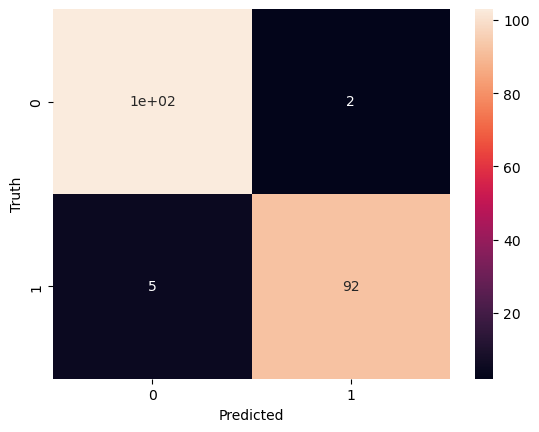

<Figure size 2000x700 with 0 Axes>

In [214]:
# from sklearn.metrics import confusion_matrix
y_predict=Gaussian.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predict,y_test)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.figure(figsize=(20,7))

In [ ]:
pd.DataFrame(confusion_matrix(y_predict,y_test),index=['predict no click','predict click'],columns=['real no click','real click'])

In [215]:
from sklearn.metrics import accuracy_score,classification_report

In [216]:
y_predict=Gaussian.predict(X_test)
print(confusion_matrix(y_predict,y_test))
print('Accuracy Score{}'.format(classification_report(y_test,y_predict)))

[[103   2]
 [  5  92]]
Accuracy Score              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.95      0.98      0.96        94

    accuracy                           0.97       202
   macro avg       0.96      0.97      0.97       202
weighted avg       0.97      0.97      0.97       202

